In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import Riesz as R
from pykeops.torch import kernel_product, Genred
from pykeops.torch.kernel_product.formula import *

use_cuda = 1
torchdeviceId = torch.device('cuda:0') if use_cuda else 'cpu'
torchdtype = torch.float32
use_keops=True
import Riesz as R
s=2
RS=R.RieszSearcher(s)

/home/emanuel/anaconda3/envs/varidist/lib/python3.7/site-packages/pykeops/torch/kernel_product/__init__.py:6: DeprecationWarning: [pyKeOps]: the kernel_product syntax is deprecated. Please consider using the LazyTensor helper instead.
  DeprecationWarning,


In [2]:
d=2 
N=1000
max_iter=401
epsilon= .00001
alpha=1/((d*N)**s) #This is just a guess for the learning rate
cnf= np.random.rand(d+1,N)-.5
cnf = R.proj(cnf)
x = torch.from_numpy(cnf).requires_grad_()

/home/emanuel/anaconda3/envs/varidist/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


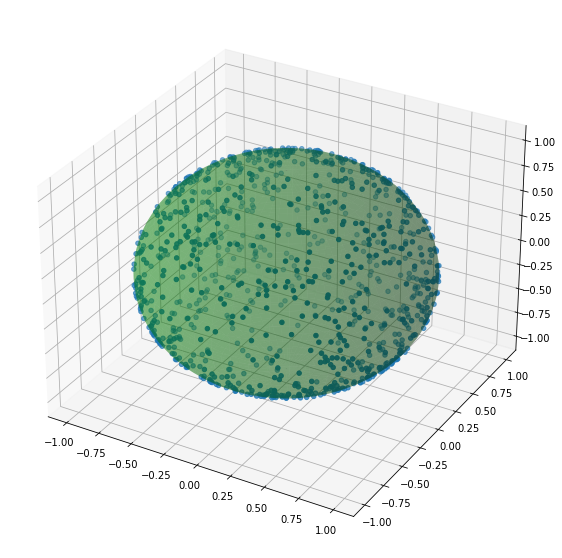

0 3147269.5 0.17774994671344757
1 2256453.25 0.3947860300540924
2 2052154.75 0.0995531678199768
3 2013622.875 0.019135596230626106
4 1939653.5 0.0381353534758091
5 1912030.375 0.014447011984884739
6 1891672.5 0.010761839337646961
7 1877883.875 0.007342639844864607
8 1866692.375 0.005995363928377628
9 1856982.5 0.005228845868259668
10 1848395.25 0.004645786713808775
11 1840695.25 0.004183202050626278
12 1833715.125 0.0038065481930971146
13 1827331.375 0.003493482479825616
14 1821449.75 0.0032290900126099586
15 1815997.375 0.003002413548529148
16 1810915.75 0.0028061079792678356
17 1806158.75 0.002633766271173954
18 1801687.875 0.002481492469087243
19 1797471.625 0.002345656044781208
20 1793484.0 0.00222339597530663
21 1789702.625 0.0021128510124981403
22 1786108.5 0.002012265846133232
23 1782685.375 0.0019202070543542504
24 1779418.75 0.0018357820808887482
25 1776296.5 0.0017577301478013396
26 1773307.75 0.0016854096902534366
27 1770442.375 0.001618451438844204
28 1767692.25 0.001555771

230 1655009.5 5.052841152064502e-05
231 1654926.75 5.000221426598728e-05
232 1654845.125 4.932485899189487e-05
233 1654764.375 4.8798487114254385e-05
234 1654684.625 4.819649620912969e-05
235 1654605.75 4.76699678984005e-05
236 1654527.875 4.706780600827187e-05
237 1654450.75 4.6616678446298465e-05
238 1654374.75 4.593880657921545e-05
239 1654299.375 4.5563094317913055e-05
240 1654225.0 4.496063047554344e-05
241 1654151.375 4.450922642718069e-05
242 1654078.75 4.390661706565879e-05
243 1654006.75 4.3530657421797514e-05
244 1653935.625 4.3003488826798275e-05
245 1653865.375 4.24762511102017e-05
246 1653796.0 4.19489479099866e-05
247 1653727.25 4.157275543548167e-05
248 1653659.375 4.104533218196593e-05
249 1653592.0 4.074463504366577e-05
250 1653525.625 4.0141501813195646e-05
251 1653460.0 3.9689501136308536e-05
252 1653395.125 3.923744588973932e-05
253 1653330.875 3.8860944187035784e-05
254 1653267.25 3.848440246656537e-05
255 1653204.25 3.8107813452370465e-05
256 1653142.25 3.75043346

In [3]:
RS.plot(x)
x = torch.from_numpy(cnf).to(dtype=torchdtype, device=torchdeviceId)
new_x,energy,dic,enr_dic=RS.pgd(x,max_iter,epsilon,alpha,display=10)

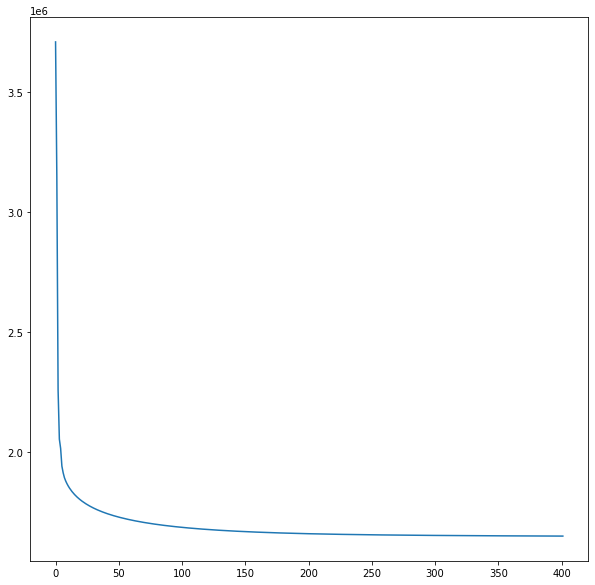

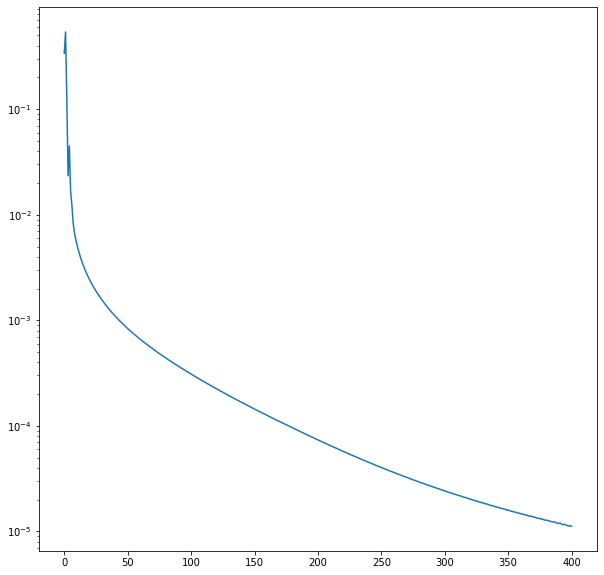

In [4]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.plot(enr_dic)
plt.show()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.set_yscale('log')
ax.plot((enr_dic[0:-1]-enr_dic[1:])/enr_dic[-1])
plt.show()

/home/emanuel/anaconda3/envs/varidist/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


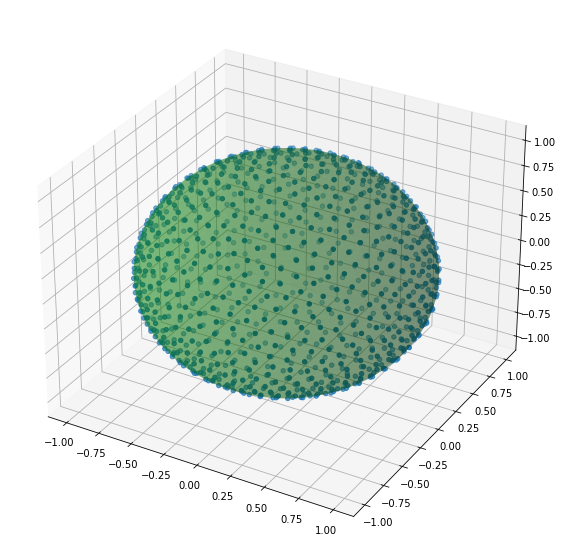

In [5]:
RS.plot(new_x)